In [1]:
%matplotlib inline
import scanpy as sc
import scvi
import numpy as np
from sctools import integrate, plot

Global seed set to 0


## Data integration using SCVI
This step aims to harmonize the data and remove batch effects

In [2]:
prefixes = ['tissue.scps', 'tissue.ad', 'tissue.uc', 'pbmc.scps']
adatas = {
    k: sc.read_h5ad(f'../data/{k}.qcfiltered.h5ad') for k in prefixes
}

adatas

{'tissue.scps': AnnData object with n_obs × n_vars = 332546 × 20912
     obs: 'sample_id', 'patient_id', 'status', 'tissue', 'cell_fraction', 'doublet', 'doublet_score', 'nFeature_RNA', 'nCount_RNA', 'percent_mt', 'percent_ribo', 'qc_pass',
 'tissue.ad': AnnData object with n_obs × n_vars = 318976 × 21750
     obs: 'sample_id', 'patient_id', 'status', 'tissue', 'cell_fraction', 'doublet', 'doublet_score', 'nFeature_RNA', 'nCount_RNA', 'percent_mt', 'percent_ribo', 'qc_pass',
 'tissue.uc': AnnData object with n_obs × n_vars = 79378 × 18436
     obs: 'sample_id', 'patient_id', 'status', 'tissue', 'cell_fraction', 'doublet', 'doublet_score', 'nFeature_RNA', 'nCount_RNA', 'percent_mt', 'percent_ribo', 'qc_pass',
 'pbmc.scps': AnnData object with n_obs × n_vars = 40148 × 15998
     obs: 'sample_id', 'patient_id', 'status', 'tissue', 'cell_fraction', 'doublet', 'doublet_score', 'nFeature_RNA', 'nCount_RNA', 'percent_mt', 'percent_ribo', 'qc_pass'}

In [ ]:
# visualize raw data
for k, adata in adatas.items():
    print(k)
    plot.integrate.raw_data_umap(
        adata,
        ['status', 'tissue', 'FOXP3'],
        size = 10,
        vmax = 0.5,
        save = f'../plots/{k}.raw.umap.png'
    )

tissue.scps


/users/daniel.malzl/.local/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:64: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


In [ ]:
integration_params = {
    k: {'kwargs': dict()} for k in adatas.keys()
}

integration_results = {}
for key, adata in adatas.items():
    print(key)
    params = integration_params[key]
    integration_results[key] = integrate.integrate_data_scvi(
        adata[params['subset'], :].copy(),
        'sample_id',
        train_size = 1,
        **params['kwargs']
    )

    integration_results[key]['data'].write(
        f'../data/{key}.integrated.h5ad'
    )

    integration_results[key]['model'].save(
        f'../data/{key}.integration.scvi.model',
        overwrite = True
    )

In [4]:
# restore results if kernel breaks or gets shut down
integration_results = {}
for key in ['tissue.scps', 'tissue.ad', 'tissue.uc', 'pbmc.scps']:
    data = sc.read_h5ad(
        f'../data/{key}.integrated.h5ad'
    )
    integration_results[key] = {
        'data': data,
        'model': scvi.model.SCVI.load(
            f'../data/{key}.integration.scvi.model', 
            adata = data
        )
    }

/users/daniel.malzl/.conda/envs/scpython/lib/python3.9/abc.py:98: FutureWarning: SparseDataset is deprecated and will be removed in late 2024. It has been replaced by the public classes CSRDataset and CSCDataset.

For instance checks, use `isinstance(X, (anndata.experimental.CSRDataset, anndata.experimental.CSCDataset))` instead.

For creation, use `anndata.experimental.sparse_dataset(X)` instead.

  return _abc_instancecheck(cls, instance)


In [5]:
fig, axs = plot.integrate.plot_integration_results(
    integration_results,
    ['status', 'sample_id', 'FOXP3', 'CD3D'],
    [
        dict(size = 10, vmax = None),
        dict(size = 10, vmax = None),
        dict(size = 10, vmax = 1),
        dict(size = 10, vmax = 10)
    ],
    data_key = 'data'
)

/users/daniel.malzl/.local/lib/python3.9/site-packages/scanpy/plotting/_utils.py:432: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/users/daniel.malzl/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/users/daniel.malzl/.local/lib/python3.9/site-packages/scanpy/plotting/_utils.py:432: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/users/daniel.malzl/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/users/daniel.malzl/.local/lib/python3.9/site-packages/scanpy/plotting/_utils.py:432: ImplicitModification

## Identification of T-cell subsets
This section aims at extracting T-cells from full dataset based on CD3D and FOXP3 expression (FOXP3 is taken into account here because the ultimate goal is to extract regulatory T-cells)

/users/daniel.malzl/.local/lib/python3.9/site-packages/scanpy/plotting/_utils.py:432: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/users/daniel.malzl/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/users/daniel.malzl/.local/lib/python3.9/site-packages/scanpy/plotting/_utils.py:432: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/users/daniel.malzl/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/users/daniel.malzl/.local/lib/python3.9/site-packages/scanpy/plotting/_utils.py:432: ImplicitModification

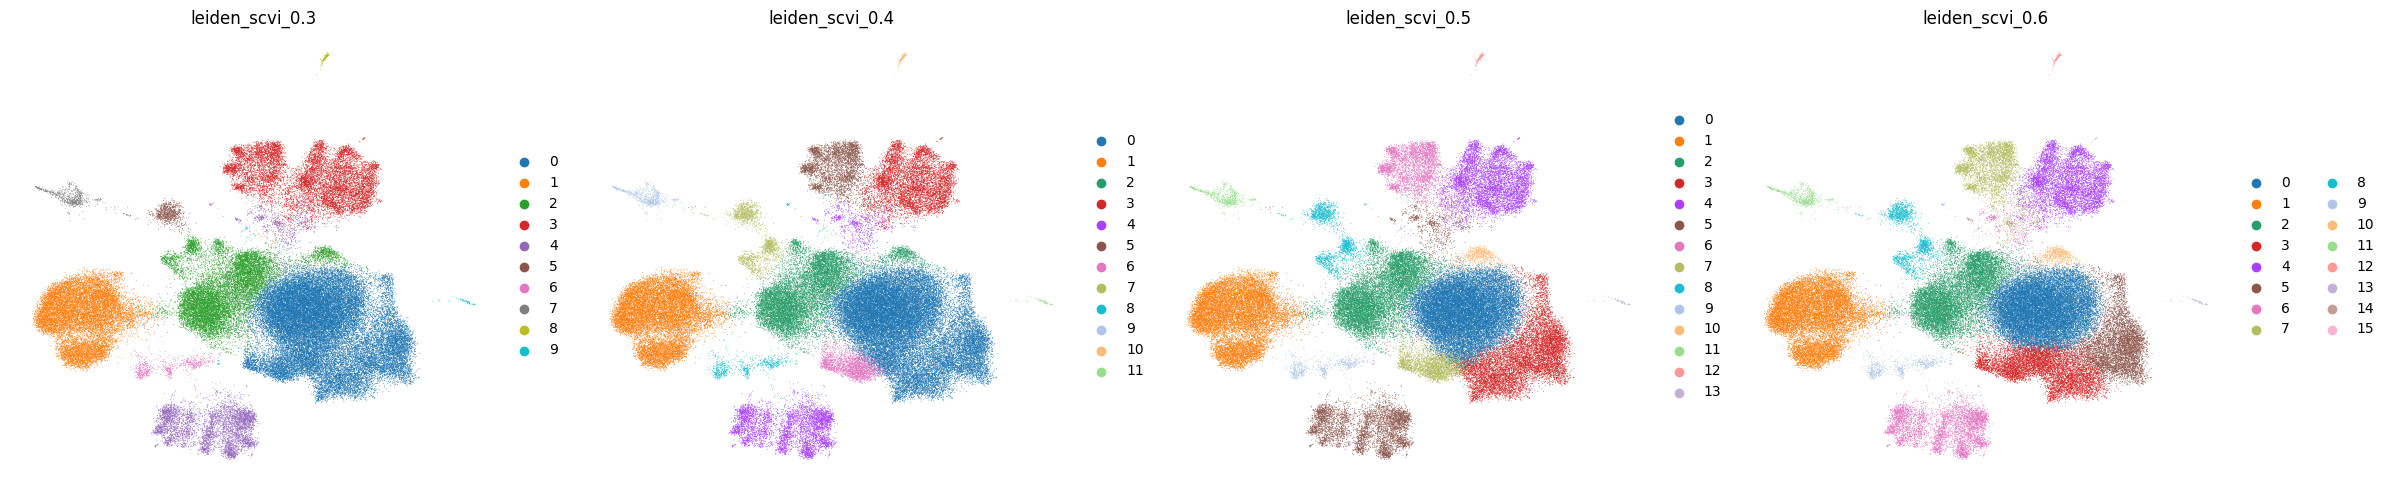

In [16]:
fig, axs = plot.integrate.plot_leiden_clusterings(
    integration_results,
    [0.3, 0.4, 0.5, 0.6],
    data_key = 'data',
    legend_loc = 'right margin'
)

In [17]:
resolutions = {
    'tissue.scps': 0.4,
    'tissue.uc': 0.4,
    'tissue.ad': 0.25,
    'pbmc.scps': 0.5
}
for k, resolution in resolutions.items():
    d = integration_results[k]
    sc.tl.leiden(
        d['data'], 
        key_added = f'leiden_scvi_{resolution}',
        resolution = resolution
    )

/users/daniel.malzl/.local/lib/python3.9/site-packages/scanpy/plotting/_utils.py:432: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/users/daniel.malzl/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


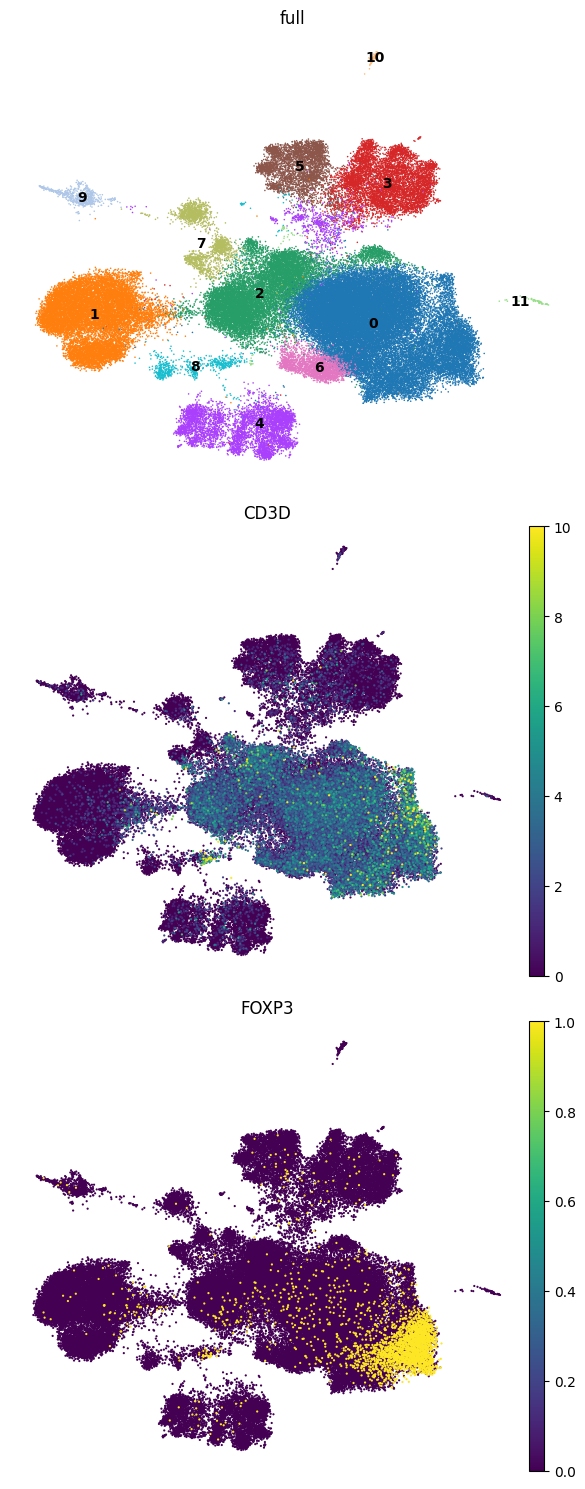

In [18]:
cluster_keys = {k: f'leiden_scvi_{r}' for k, r in resolutions.items()}
fig, axs = plot.integrate.plot_clustering_and_expression(
    integration_results,
    cluster_keys,
    ['CD3D', 'FOXP3'],
    [
        dict(size = 10, vmax = None, legend_loc = 'on data'),
        dict(size = 10, vmax = 10),
        dict(size = 10, vmax = 1)
    ],
    data_key = 'data'
)

In [ ]:
tcell_clusters = {
    'tissue.scps': '2,4,6',
    'tissue.uc': '2,4,6',
    'tissue.ad': '2,4,6',
    'pbmc.scps': '2,4,6'
}

tcell_clusters = {
    k: [c for c in cs.split(',')] for k, cs in tcell_clusters.items()
}

full coarse_cell_types
Tcell    46867
other    32511
Name: sample_id, dtype: int64


/users/daniel.malzl/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1301: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/users/daniel.malzl/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/users/daniel.malzl/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1301: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


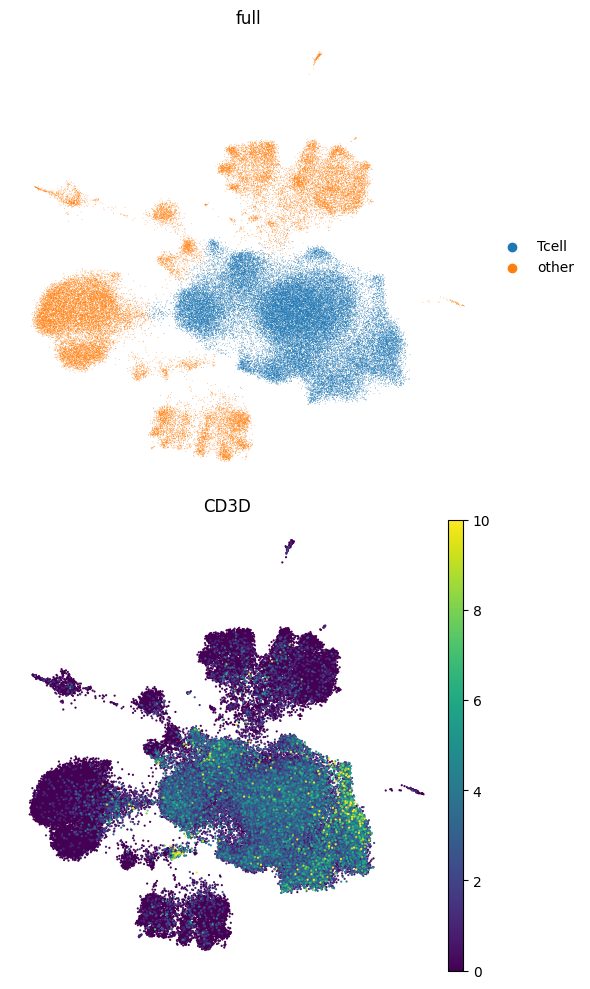

In [ ]:
for k, d in integration_results.items():
    clustering = cluster_keys[k]
    cluster_to_tcell = tcell_clusters[k]
    d['data'].obs['coarse_cell_types'] = d['data'].obs[clustering].apply(
        lambda x: 'Tcell' if x in cluster_to_tcell[k] else 'other'
    )
    print(k, d['data'].obs.groupby('coarse_cell_types').count().iloc[:, 0])
    
fig, axs = plot.integrate.plot_clustering_and_expression(
    integration_results,
    {k: 'coarse_cell_types' for k in integration_results.keys()},
    ['CD3D'],
    [
        dict(size = 10, vmax = None),
        dict(size = 10, vmax = 10)
    ],
    data_key = 'data'
)

In [ ]:
for k, d in integration_results.items():
    d['data'].write(
        f'../data/{k}.integrated.clustered.h5ad'
    )